In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [26]:
extreme_days = pd.read_csv('extreme_days.csv')
non_extreme_days = pd.read_csv('non_extreme_days.csv')
merged = pd.read_csv('merged.csv')

In [27]:
conditions = {
    'High Temp (>97°F)': merged['tempmax'] > 97,
    'Low Temp (<25°F)': merged['tempmin'] < 25,
    'High Wind (>25 mph)': merged['windspeed'] > 25,
    'Heavy Rain (>1 in)': merged['precip'] > 1,
    'Heavy Snow (>1 in)': merged['snow'] > 1,
}

In [28]:
results = {}
for label, mask in conditions.items():
    results[label] = merged[mask]['call_volume'].mean()

results['Overall Extreme']     = extreme_days['call_volume'].mean()
results['Overall Non-Extreme'] = non_extreme_days['call_volume'].mean()

means_df = pd.DataFrame.from_dict(results, orient='index', columns=['mean_call_volume'])
print(means_df)

                     mean_call_volume
High Temp (>97°F)           58.222222
Low Temp (<25°F)            53.933333
High Wind (>25 mph)         49.700000
Heavy Rain (>1 in)          51.173913
Heavy Snow (>1 in)          56.818182
Overall Extreme             53.052632
Overall Non-Extreme         50.995146


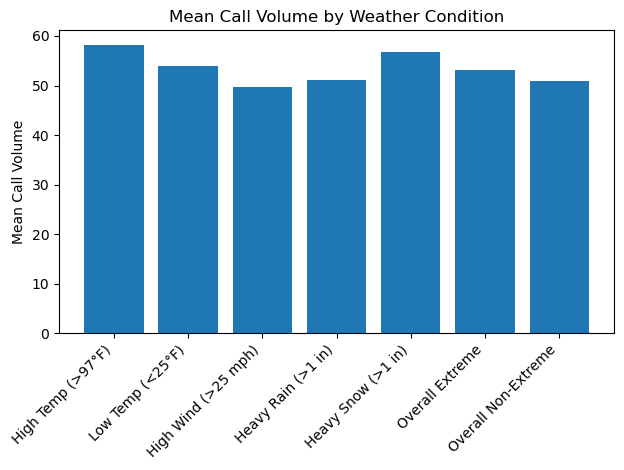

In [29]:
labels = list(results.keys())
means = list(results.values())

plt.figure()
plt.bar(labels, means)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Call Volume')
plt.title('Mean Call Volume by Weather Condition')
plt.tight_layout()
plt.show()

In [30]:
conditions = {
    'High Temp (>97°F)': merged['tempmax'] > 97,
    'Low Temp (<25°F)': merged['tempmin'] < 25,
    'High Wind (>25 mph)': merged['windspeed'] > 25,
    'Heavy Rain (>1 in)': merged['precip'] > 1,
    'Heavy Snow (>1 in)': merged['snow'] > 1,
}

In [31]:
results = {}
for label, mask in conditions.items():
    group = merged[mask]['call_volume']
    complement = merged[~mask]['call_volume']
    t_stat, p_val = ttest_ind(group, complement, equal_var=False)
    results[label] = {
        'N_extreme': len(group),
        't_stat': t_stat,
        'p_value': p_val
    }

t_overall, p_overall = ttest_ind(extreme_days['call_volume'], non_extreme_days['call_volume'], equal_var=False)

print("T-Test Results by Condition:")
for cond, res in results.items():
    print(f"{cond:20s} | N={res['N_extreme']:4d} | t={res['t_stat']:.3f} | p={res['p_value']:.3f}")
print("\nOverall Extreme vs. Non-Extreme:")
print(f"N_extreme={len(extreme_days)}, t={t_overall:.3f}, p={p_overall:.3f}")

T-Test Results by Condition:
High Temp (>97°F)    | N=  27 | t=3.506 | p=0.002
Low Temp (<25°F)     | N=  30 | t=0.936 | p=0.357
High Wind (>25 mph)  | N=  30 | t=-0.467 | p=0.644
Heavy Rain (>1 in)   | N=  23 | t=0.011 | p=0.991
Heavy Snow (>1 in)   | N=  11 | t=1.972 | p=0.076

Overall Extreme vs. Non-Extreme:
N_extreme=114, t=1.483, p=0.141


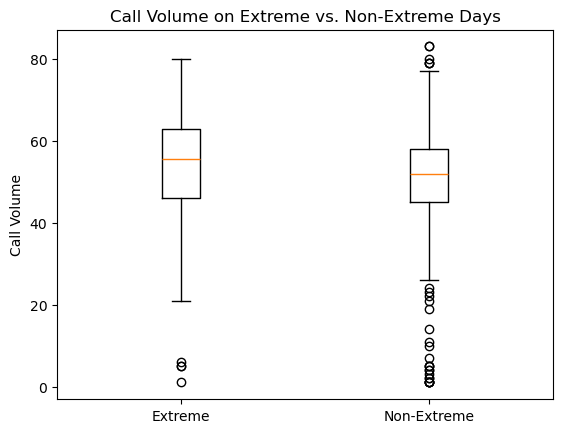

In [32]:
plt.figure()
plt.boxplot([
    extreme_days['call_volume'],
    non_extreme_days['call_volume']
], labels=['Extreme', 'Non-Extreme'])
plt.ylabel('Call Volume')
plt.title('Call Volume on Extreme vs. Non-Extreme Days')
plt.show()